In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
X = mnist["data"]
y = mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
shuffle_indexes = np.random.permutation(70000)
X, y = X[shuffle_indexes], y[shuffle_indexes]
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]


y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)


y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train_5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
# print(y_train)
print(y_test_5)
'''for i in range(y_test.shape[0]):
    if y_test[i] == 5:
        print(i)'''

[ True False False ... False False False]


'for i in range(y_test.shape[0]):\n    if y_test[i] == 5:\n        print(i)'

In [13]:
print(knn.predict([X_test[2]]))
print(y_test[2])
# knn.score(X_test, y_test_5)

[False]
4


0.9938

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [15]:
y_preds = knn.predict(X_test)
cross_val_score(knn, X_test, y_test_5, cv=3, scoring="accuracy")

array([0.98590282, 0.98559856, 0.98619862])

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_test_pred = cross_val_predict(knn, X_test, y_test_5, cv=3)
confusion_matrix(y_test_5, y_test_pred)

array([[9044,   48],
       [  93,  815]], dtype=int64)

In [21]:
from sklearn.metrics import precision_score, recall_score

prec = precision_score(y_test_5, y_test_pred)
print(prec)

recall = recall_score(y_test_5, y_test_pred)
print(recall)


0.944380069524913
0.8975770925110133


In [24]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(knn, X_test, y_test_5, cv=3)
precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_scores)

[False  True]
Min: False
Max: True


(0.0, 1.0)

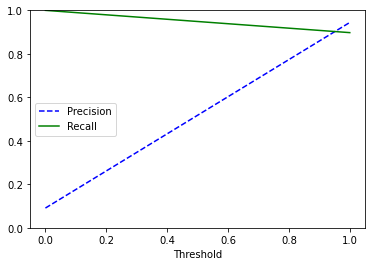

In [28]:
print(thresholds)

print("Min: {0}".format( np.min(y_scores)))
print("Max: {0}".format( np.max(y_scores)))

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.ylim([0, 1])

Text(0, 0.5, 'precision')

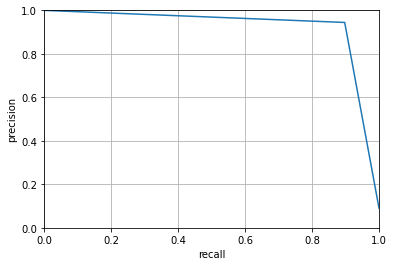

In [29]:
plt.plot(recalls, precisions)
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid()
plt.xlabel("recall")
plt.ylabel("precision")